In [1]:
from qiskit import *
import numpy as np
import matplotlib
%matplotlib inline

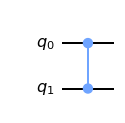

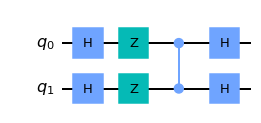

In [3]:
#Grover Oracle
oracle = QuantumCircuit(2, name='Oracle')
oracle.cz(0,1)
display(oracle.draw(output='mpl'))

#Diffusing
diff = QuantumCircuit(2, name='Reflection')
diff.h([0,1])
#Reflection within the diffuser
diff.z([0,1])
diff.cz(0,1)

diff.h([0,1])
diff.to_gate()
diff.draw(output='mpl')

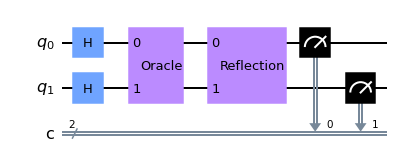

In [41]:
cirq = QuantumCircuit(2,2)
cirq.h([0,1])
cirq.append(oracle,[0,1])
cirq.append(diff, [0,1])
cirq.measure([0,1],[0,1])
cirq.draw(output='mpl')

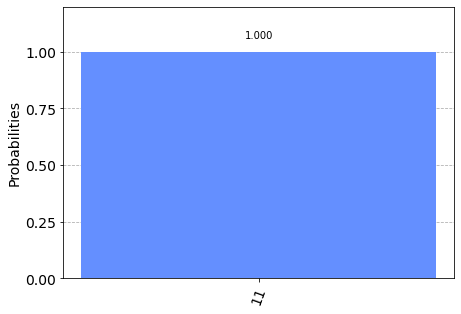

In [42]:
backend = Aer.get_backend('statevector_simulator')
job=execute(cirq,backend,shots=1048)
result = job.result()
qiskit.visualization.plot_histogram(result.get_counts())

## Modified Version:

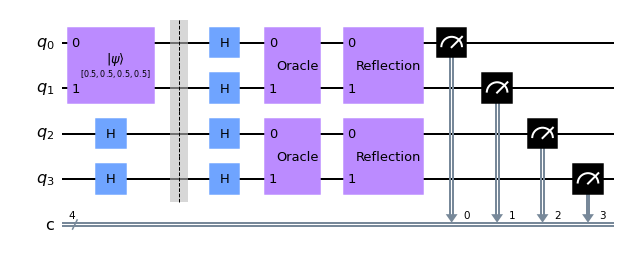

In [43]:
mod = QuantumCircuit(4,4)

init = [1/2, 1/2, 1/2, 1/2]
mod.initialize(init, [0,1])

mod.h([2,3])
mod.barrier()

#Doing oracles and reflections in parallel
mod.h([0,1,2,3])
mod.append(oracle, [0,1])
mod.append(oracle, [2,3])

mod.append(diff, [0,1])
mod.append(diff,[2,3])

mod.measure([0,1,2,3], [0,1,2,3])

display(mod.draw(output='mpl'))

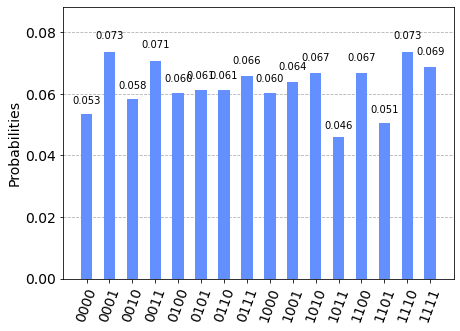

In [44]:
backend = Aer.get_backend('statevector_simulator')
job=execute(mod, backend, shots=1048)
result = job.result()
counts = result.get_counts()
qiskit.visualization.plot_histogram(counts)